<a href="https://colab.research.google.com/github/HUSILEBAI/Earth_Radiative_Heat_Balance/blob/main/EES_Seminar_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the practise code for climate mode analysis. Start with connecting your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install cartopy
!pip install cartopy

In [ ]:
import glob
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Calculate spectral radiance

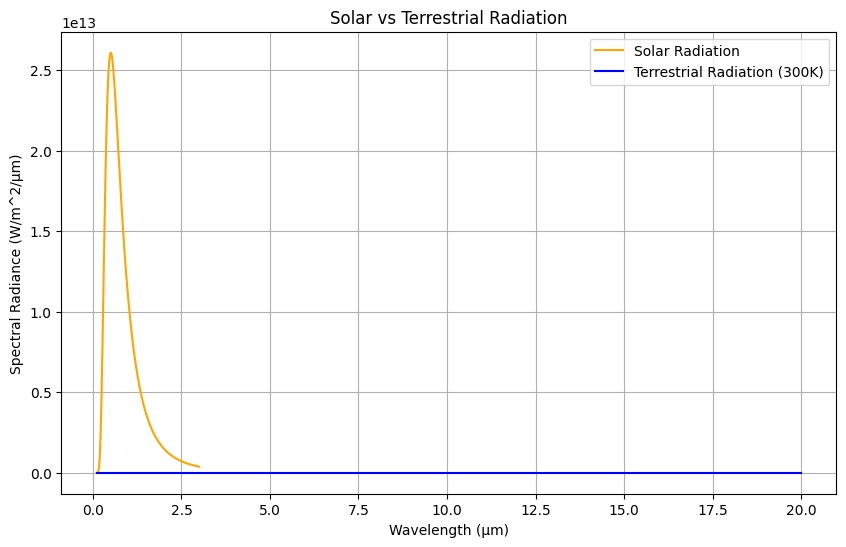

In [ ]:
# it is challenging the create two spectrum to one figure as they don't share same range

plt.rcParams['figure.facecolor'] = 'white'

# Define constants
h = 6.626e-34  # Planck's constant
c = 3.0e+8     # Speed of light
k = 1.38e-23   # Boltzmann constant

# Define function to calculate solar spectral radiance
def solar_radiance(wavelength):
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * 5770)) - 1))

# Define function to calculate terrestrial spectral radiance
def terrestrial_radiance(wavelength, temperature):
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * temperature)) - 1))

# Define wavelengths in micrometers (μm)
wavelengths_solar = np.linspace(0.1, 3, 1000)  # Wavelengths for solar radiation
wavelengths_terrestrial = np.linspace(0.1, 20, 1000)  # Wavelengths for terrestrial radiation

# Calculate solar and terrestrial radiance
solar_radiance_values = solar_radiance(wavelengths_solar * 1e-6)  # Convert to meters
terrestrial_radiance_values = terrestrial_radiance(wavelengths_terrestrial * 1e-6, 300)  # Temperature for terrestrial radiation

# Plot solar and terrestrial radiation
plt.figure(figsize=(10, 6))
plt.plot(wavelengths_solar, solar_radiance_values, label='Solar Radiation', color='orange')
plt.plot(wavelengths_terrestrial, terrestrial_radiance_values, label='Terrestrial Radiation (300K)', color='blue')

# Adjust y-axis scale
# plt.yscale('log')

plt.xlabel('Wavelength (μm)')
plt.ylabel('Spectral Radiance (W/m^2/μm)')
plt.title('Solar vs Terrestrial Radiation')
plt.legend()
plt.grid(True)
plt.show()


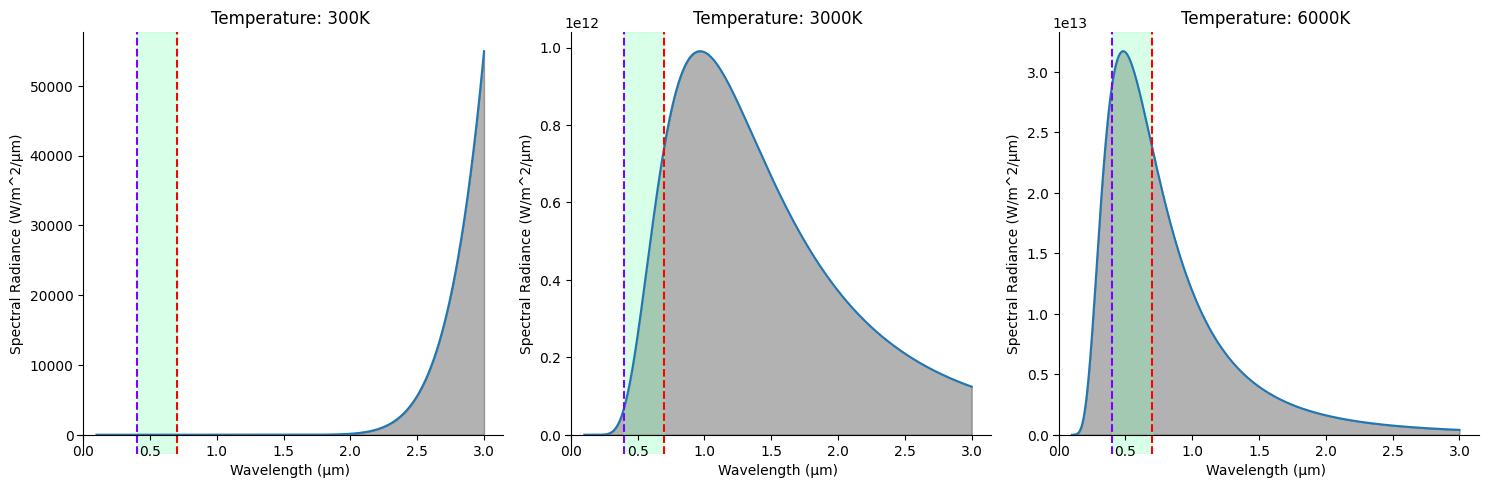

In [95]:
plt.rcParams['figure.facecolor'] = 'white'

# Define constants
h = 6.626e-34  # Planck's constant
c = 3.0e+8     # Speed of light
k = 1.38e-23   # Boltzmann constant

# Define function to calculate spectral radiance
def spectral_radiance(wavelength, temperature):
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * temperature)) - 1))

# Define wavelengths in micrometers (μm)
wavelengths = np.linspace(0.1, 3, 1000)  # Wavelengths from 0.1 μm to 3 μm

# Define temperatures
temperatures = [300, 3000, 6000]  # in Kelvin

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for each temperature
for i, temp in enumerate(temperatures):
    ax = axes[i]
    radiance = spectral_radiance(wavelengths * 1e-6, temp)  # Convert wavelengths to meters
    ax.plot(wavelengths, radiance, label=f"{temp}K")
    ax.fill_between(wavelengths, radiance, where=(radiance >= 0), color='black', alpha=0.3)  # Fill area under the radiance line
    ax.set_xlabel('Wavelength (μm)')  # Set xlabel in micrometers
    ax.set_ylabel('Spectral Radiance (W/m^2/μm)')
    ax.set_title(f'Temperature: {temp}K')
    # ax.legend()
    # ax.set_xlim([0, 3])
    ax.tick_params(axis='x', colors='black')  # Set tick color to black
    ax.tick_params(axis='y', colors='black')  # Set tick color to black
    ax.spines['bottom'].set_color('black')  # Set bottom spine color to black
    ax.spines['top'].set_color('black')  # Set top spine color to black
    ax.spines['left'].set_color('black')  # Set left spine color to black
    ax.spines['right'].set_color('black')  # Set right spine color to black
    # Add rainbow-colored vertical lines
    rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 2))
    for color, xpos in zip(rainbow_colors, [0.4, 0.7]):
        ax.axvline(x=xpos, color=color, linestyle='--')
    ax.axvspan(0.4, 0.7, color=plt.cm.rainbow(0.5), alpha=0.3)

    # Overlay x and y axes
    ax.spines['left'].set_position('zero')  # Set y-axis spine position to overlay
    ax.spines['bottom'].set_position('zero')  # Set x-axis spine position to overlay

    # Hide right and top spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

plt.tight_layout()
plt.show()

# Distribution of Power Emitted by a Blackbody

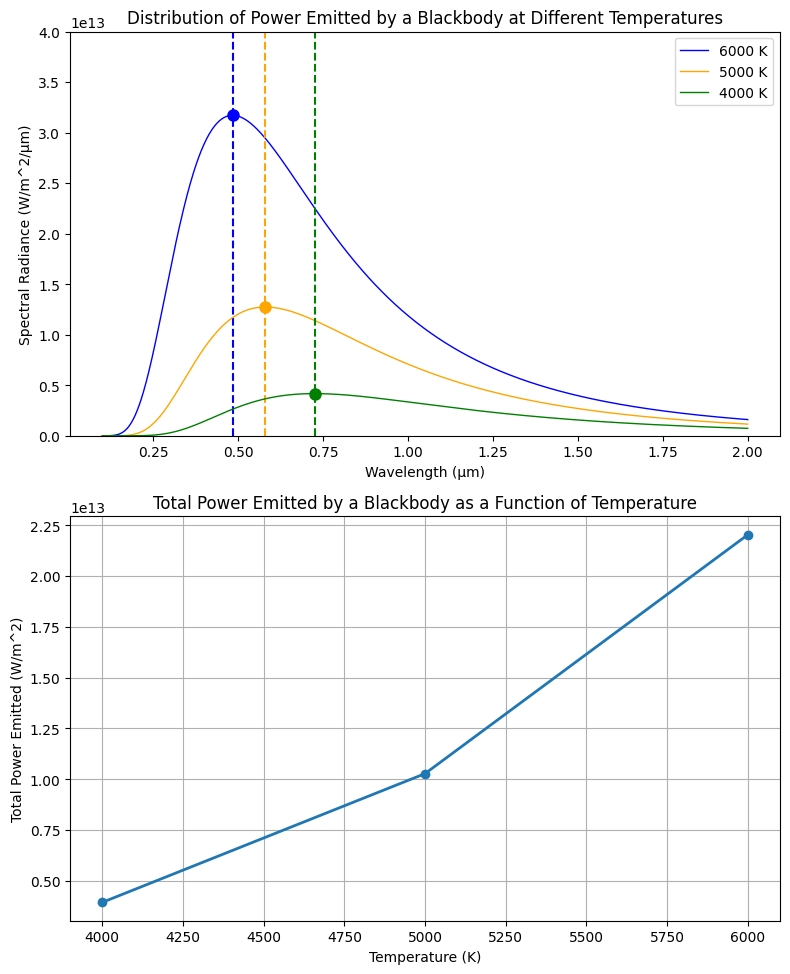

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant (J*s)
c = 3.0e+8     # Speed of light (m/s)
k = 1.38e-23   # Boltzmann constant (J/K)

# Function to calculate spectral radiance of a blackbody
def spectral_radiance(wavelength, temperature):
    wavelength_m = wavelength * 1e-6  # Convert wavelength to meters
    return (2 * h * c**2) / (wavelength_m**5 * (np.exp((h * c) / (wavelength_m * k * temperature)) - 1))

# Wavelengths in micrometers (μm)
wavelengths = np.linspace(0.1, 2, 1000)  # Wavelengths from 0.1 μm to 3 μm

# Temperatures in Kelvin
temperatures = [6000, 5000, 4000] #[300, 340, 400]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot (a): Distribution of power emitted by a blackbody at different temperatures
colors = ['blue', 'orange', 'green']
for i, temp in enumerate(temperatures):
    radiance = spectral_radiance(wavelengths, temp)
    color = colors[i % len(colors)]  # Cycle through colors if more temperatures than colors
    axes[0].plot(wavelengths, radiance, label=f"{temp} K", color=color, linewidth=1.0)
    peak_wavelength = wavelengths[np.argmax(radiance)]  # Find wavelength at peak
    peak_radiance = np.max(radiance)  # Find radiance at peak
    axes[0].plot(peak_wavelength, peak_radiance, marker='o', markersize=8, color=color)  # Add dot marker at peak
    axes[0].axvline(x=peak_wavelength, linestyle='--', color=color)  # Add vertical dashed line at peak
# axes[0].axvline(x=0.4, linestyle='--', color='purple', linewidth=2.5)  # Add vertical dashed line at x=0.4
# axes[0].axvline(x=0.7, linestyle='--', color='red', linewidth=2.5)  # Add vertical dashed line at x=0.7
axes[0].set_ylim([0, 4e13])
axes[0].set_xlabel('Wavelength (μm)')
axes[0].set_ylabel('Spectral Radiance (W/m^2/μm)')
axes[0].set_title('Distribution of Power Emitted by a Blackbody at Different Temperatures')
axes[0].legend()
axes[0].grid(False)

# Plot (b): Total power emitted by a blackbody as a function of temperature
total_power = [np.trapz(spectral_radiance(wavelengths, temp), wavelengths) for temp in temperatures]
axes[1].plot(temperatures, total_power, marker='o', linestyle='-', linewidth=2)
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Total Power Emitted (W/m^2)')
axes[1].set_title('Total Power Emitted by a Blackbody as a Function of Temperature')
axes[1].grid(True)

plt.tight_layout()
plt.show()

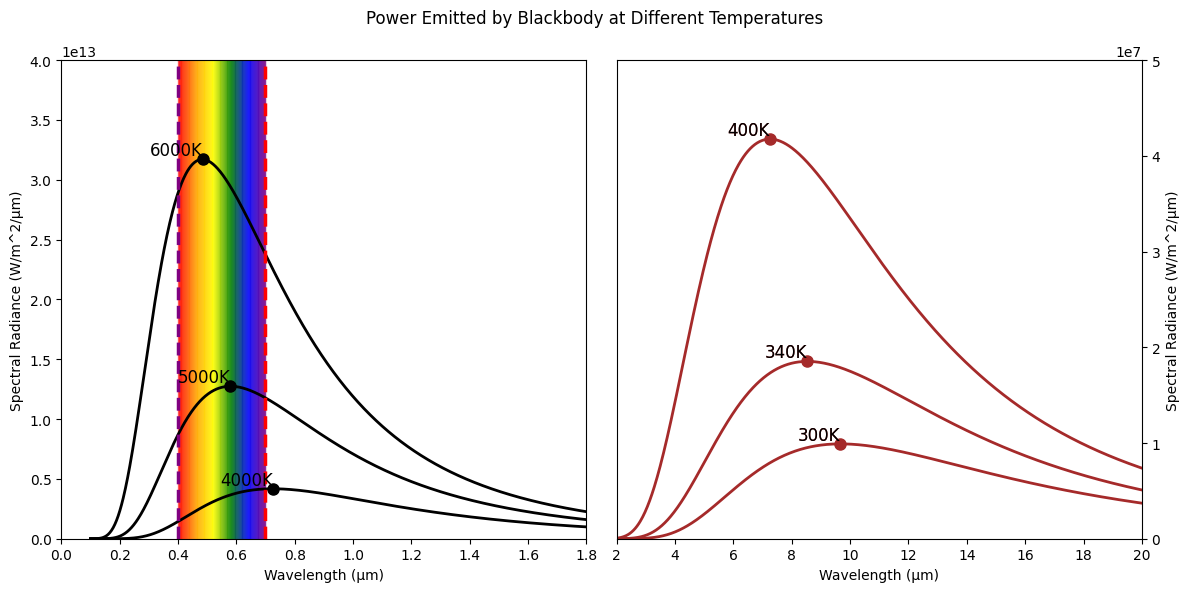

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Constants
h = 6.626e-34  # Planck's constant (J*s)
c = 3.0e+8     # Speed of light (m/s)
k = 1.38e-23   # Boltzmann constant (J/K)

# Function to calculate spectral radiance of a blackbody
def spectral_radiance(wavelength, temperature):
    wavelength_m = wavelength * 1e-6  # Convert wavelength to meters
    return (2 * h * c**2) / (wavelength_m**5 * (np.exp((h * c) / (wavelength_m * k * temperature)) - 1))

# Wavelengths in micrometers (μm)
wavelengths_a = np.linspace(0.1, 2, 1000)  # Wavelengths from 0.1 μm to 2 μm
wavelengths_b = np.linspace(0.1, 20, 1000)  # Wavelengths from 0.1 μm to 20 μm

# Temperatures for subplot (a) in Kelvin
temperatures_a = [6000, 5000, 4000]

# Temperatures for subplot (b) in Kelvin
temperatures_b = [300, 340, 400]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot (a): Distribution of power emitted by a blackbody at different temperatures
colors = ['black'] #['blue', 'orange', 'green']
for i, temp in enumerate(temperatures_a):
    radiance = spectral_radiance(wavelengths_a, temp)
    color = colors[i % len(colors)]  # Cycle through colors if more temperatures than colors
    axes[0].plot(wavelengths_a, radiance, label=f"{temp} K", color=color, linewidth=2.0)
    peak_wavelength = wavelengths_a[np.argmax(radiance)]  # Find wavelength at peak
    peak_radiance = np.max(radiance)  # Find radiance at peak
    axes[0].plot(peak_wavelength, peak_radiance, marker='o', markersize=8, color=color)  # Add dot marker at peak color=color
    axes[0].text(peak_wavelength, peak_radiance, f'{temp}K', ha='right', va='bottom', fontsize=12, color='black')
axes[0].axvline(x=0.4, linestyle='--', color='purple', linewidth=2.5)  # Add vertical dashed line at x=0.4
axes[0].axvline(x=0.7, linestyle='--', color='red', linewidth=2.5)  # Add vertical dashed line at x=0.7
axes[0].set_xlim([0, 1.8])
axes[0].set_ylim([0, 4e13])
axes[0].set_xlabel('Wavelength (μm)')
axes[0].set_ylabel('Spectral Radiance (W/m^2/μm)')
# Shade the area between x=0.4 and x=0.7 with rainbow colors
x_fill = np.linspace(0.4, 0.7, 100)
y_fill = np.full_like(x_fill, 4e13)  # Fill to the top of the y-axis
rainbow_cmap = LinearSegmentedColormap.from_list('rainbow', [(0, 'red'), (0.2, 'orange'), (0.4, 'yellow'), (0.6, 'green'), (0.8, 'blue'), (1, 'purple')])
colors = rainbow_cmap(np.linspace(0, 1, len(x_fill)))
for i in range(len(x_fill)-1):
    axes[0].fill_between([x_fill[i], x_fill[i+1]], 0, [y_fill[i], y_fill[i+1]], color=colors[i], alpha=0.5)

axes[0].grid(False)

# Plot (b): Distribution of power emitted by a blackbody at different temperatures
colors = ['brown']#['blue', 'orange', 'green']
for i, temp in enumerate(temperatures_b):
    radiance = spectral_radiance(wavelengths_b, temp)
    color = colors[i % len(colors)]  # Cycle through colors if more temperatures than colors
    axes[1].plot(wavelengths_b, radiance, label=f"{temp} K", color=color, linewidth=2.0)
    peak_wavelength = wavelengths_b[np.argmax(radiance)]  # Find wavelength at peak
    peak_radiance = np.max(radiance)  # Find radiance at peak
    axes[1].plot(peak_wavelength, peak_radiance, marker='o', markersize=8, color=color)  # Add dot marker at peak
    axes[1].text(peak_wavelength, peak_radiance, f'{temp}K', ha='right', va='bottom', fontsize=12, color=color)
    # axes[1].axvline(x=peak_wavelength, linestyle='--', color=color)  # Add vertical dashed line at peak
    axes[1].text(peak_wavelength, peak_radiance, f'{temp}K', ha='right', va='bottom', fontsize=12, color='black')
axes[1].set_ylim([0, 5e7])
axes[1].set_xlim([2, 20])  # Adjusted x-axis range
axes[1].set_xlabel('Wavelength (μm)')
axes[1].set_ylabel('Spectral Radiance (W/m^2/μm)', color='black')
axes[1].grid(False)
axes[1].yaxis.tick_right()  # Show y-axis on the left side
axes[1].yaxis.set_label_position("right")
# Set title for both subplots
fig.suptitle('Power Emitted by Blackbody at Different Temperatures')


plt.tight_layout()
plt.show()


In [59]:
axes[1].tick_params

<bound method _AxesBase.tick_params of <Axes: xlabel='Wavelength (μm)', ylabel='Spectral Radiance (W/m^2/μm)'>>

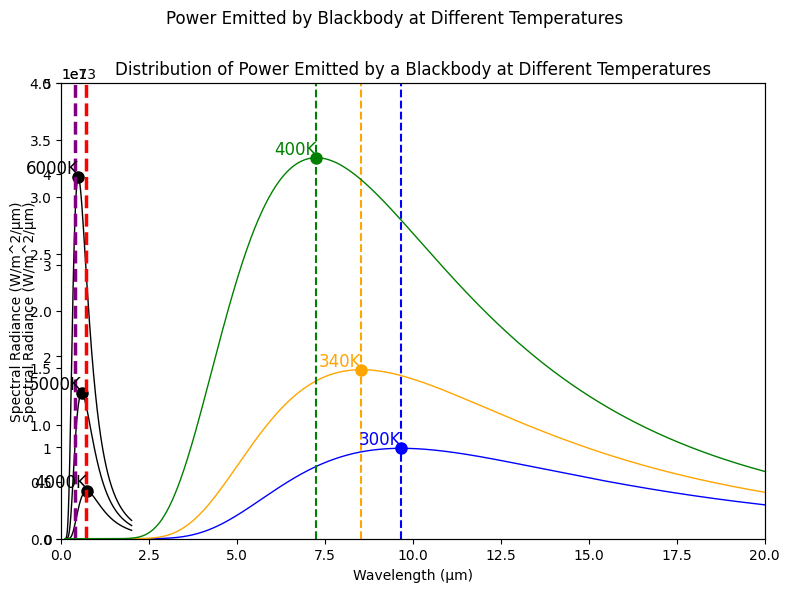

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant (J*s)
c = 3.0e+8     # Speed of light (m/s)
k = 1.38e-23   # Boltzmann constant (J/K)

# Function to calculate spectral radiance of a blackbody
def spectral_radiance(wavelength, temperature):
    wavelength_m = wavelength * 1e-6  # Convert wavelength to meters
    return (2 * h * c**2) / (wavelength_m**5 * (np.exp((h * c) / (wavelength_m * k * temperature)) - 1))

# Wavelengths in micrometers (μm)
wavelengths_a = np.linspace(0.1, 2, 1000)  # Wavelengths from 0.1 μm to 2 μm
wavelengths_b = np.linspace(0.1, 20, 1000)  # Wavelengths from 0.1 μm to 20 μm

# Temperatures for subplot (a) in Kelvin
temperatures_a = [6000, 5000, 4000]

# Temperatures for subplot (b) in Kelvin
temperatures_b = [300, 340, 400]

# Create figure and subplots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot (a): Distribution of power emitted by a blackbody at different temperatures
colors = ['black'] #['blue', 'orange', 'green']
for i, temp in enumerate(temperatures_a):
    radiance = spectral_radiance(wavelengths_a, temp)
    color = colors[i % len(colors)]  # Cycle through colors if more temperatures than colors
    ax1.plot(wavelengths_a, radiance, label=f"{temp} K", color=color, linewidth=1.0)
    peak_wavelength = wavelengths_a[np.argmax(radiance)]  # Find wavelength at peak
    peak_radiance = np.max(radiance)  # Find radiance at peak
    ax1.plot(peak_wavelength, peak_radiance, marker='o', markersize=8, color=color)  # Add dot marker at peak
    ax1.text(peak_wavelength, peak_radiance, f'{temp}K', ha='right', va='bottom', fontsize=12, color=color)
ax1.axvline(x=0.4, linestyle='--', color='purple', linewidth=2.5)  # Add vertical dashed line at x=0.4
ax1.axvline(x=0.7, linestyle='--', color='red', linewidth=2.5)  # Add vertical dashed line at x=0.7
ax1.set_ylim([0, 4e13])
ax1.set_xlim([0, 2])  # Adjusted x-axis range
ax1.set_xlabel('Wavelength (μm)')
ax1.set_ylabel('Spectral Radiance (W/m^2/μm)', color='black')
ax1.set_title('Distribution of Power Emitted by a Blackbody at Different Temperatures')
# ax1.legend()
ax1.grid(False)

# Create twin Axes for subplot (b)
ax2 = ax1.twinx()


# Plot (b): Distribution of power emitted by a blackbody at different temperatures
colors = ['blue', 'orange', 'green']
for i, temp in enumerate(temperatures_b):
    radiance = spectral_radiance(wavelengths_b, temp)
    color = colors[i % len(colors)]  # Cycle through colors if more temperatures than colors
    ax2.plot(wavelengths_b, radiance, label=f"{temp} K", color=color, linewidth=1.0)
    peak_wavelength = wavelengths_b[np.argmax(radiance)]  # Find wavelength at peak
    peak_radiance = np.max(radiance)  # Find radiance at peak
    ax2.plot(peak_wavelength, peak_radiance, marker='o', markersize=8, color=color)  # Add dot marker at peak
    ax2.text(peak_wavelength, peak_radiance, f'{temp}K', ha='right', va='bottom', fontsize=12, color=color)
    ax2.axvline(x=peak_wavelength, linestyle='--', color=color)  # Add vertical dashed line at peak
ax2.set_ylim([0, 5e7])
ax2.set_xlim([0, 20])  # Adjusted x-axis range
ax2.set_ylabel('Spectral Radiance (W/m^2/μm)', color='black')
# ax2.legend(loc='upper left')
ax2.grid(False)

# Set title for the figure
fig.suptitle('Power Emitted by Blackbody at Different Temperatures')

plt.tight_layout()
plt.show()


# Near surface (2-m) air temperature analysis

* Now, let's download the data using <button style="background-color: #f0f0f0; border: 1px solid #ccc; padding: 20px 30px; border-radius: 10px; cursor: pointer; font-size: 16px;">!curl -O -C</button> command. Here, we use [NCEP/DOE Reanalysis II](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html).

* Note that you only need to run this section once. And you can turn it off after you have your data downloaded.

In [ ]:
!curl -O -C - https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/Monthlies/gaussian_grid/air.2m.mon.mean.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.2M  100 19.2M    0     0  13.4M      0  0:00:01  0:00:01 --:--:-- 13.4M


### Read near surface air temperature with [xarray](https://docs.xarray.dev/en/stable/)
<button style="background-color: #f0f0f0; border: 1px solid #ccc; padding: 20px 30px; border-radius: 10px; cursor: pointer; font-size: 16px;">xarray.open_dataset("file_name.nc")</button>

In [ ]:
file_name = f"air.2m.mon.mean.nc"
t2_dat = xr.open_dataset(file_name)
t2_dat = t2_dat.isel(lat=slice(None, None, -1))
t2_dat

### Annual mean temperature



In [ ]:
lat = t2_dat.lat
lon = t2_dat.lon
air_dat = t2_dat.air
air_dat_subset = air_dat.where((air_dat['time.year'] >= 1980) & (air_dat['time.year'] <= 2023), drop=True)
air_mean = air_dat_subset.mean({'time','level'})
air_mean

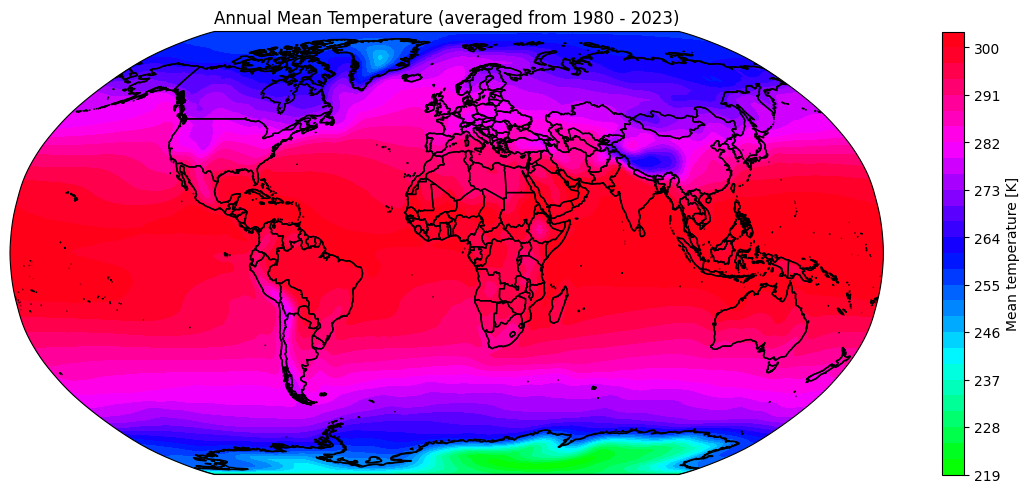

In [ ]:
import cartopy.util as cutil
from cartopy.feature import NaturalEarthFeature

# Adding cyclic to the data and coordinates
cdata, clon, clat = cutil.add_cyclic(air_mean, lon, lat)
vmin=180
vmax=300
# Plotting
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
cb = ax.contourf(clon, clat, cdata,
                 levels=30,
                 vmin = vmin,
                 vmax = vmax,
                 transform=ccrs.PlateCarree(),
                 cmap='hsv')  # Assuming you want to plot the first level
cbar = plt.colorbar(cb, ax=ax, orientation='vertical')
cbar.set_label('Mean temperature [K]')
ax.coastlines()
ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none', edgecolor='black'))
plt.title('Annual Mean Temperature (averaged from 1980 - 2023)')
# Tight layout to adjust spacing
plt.tight_layout()
plt.show()
